<a href="https://colab.research.google.com/github/Nami-59/Game/blob/main/%D0%90%D0%B3%D0%B5%D0%BD%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np

In [ ]:
import csv
import pandas
import matplotlib.pyplot as plt

In [ ]:
def index(x11, x12, x13, x21, x22, x23, x31, x32, x33):
  num = ((((((((x11*3)+x12)*3+x13)*3+x21)*3+x22)*3+x23)*3+x31)*3+x32)*3+x33
  return num

## Таблица вероятностей

In [ ]:
def probability(V):

    for i1 in range(3):
      for i2 in range(3):
        for i3 in range(3):
          for i4 in range(3):
            for i5 in range(3):
              for i6 in range(3):
                for i7 in range(3):
                  for i8 in range(3):
                    for i9 in range(3):

                      if (i1 == i2 == i3 == 2) or (i4 == i5 == i6 == 2) or (i7 == i8 == i9 == 2) or (i1 == i5 == i9 == 2):
                        num = index(i1, i2, i3, i4, i5, i6, i7, i8, i9)
                        V[num] = 1

                      if (i3 == i5 == i7 == 2) or (i1 == i4 == i7 == 2) or (i2 == i5 == i8 == 2) or (i3 == i6 == i9 == 2):
                        num = index(i1, i2, i3, i4, i5, i6, i7, i8, i9)
                        V[num] = 1

                      if (i1 == i2 == i3 == 1) or (i4 == i5 == i6 == 1) or (i7 == i8 == i9 == 1) or (i1 == i5 == i9 == 1):
                        num = index(i1, i2, i3, i4, i5, i6, i7, i8, i9)
                        V[num] = 0

                      if (i3 == i5 == i7 == 1) or (i1 == i4 == i7 == 1) or (i2 == i5 == i8 == 1) or (i3 == i6 == i9 == 1):
                        num = index(i1, i2, i3, i4, i5, i6, i7, i8, i9)
                        V[num] = 0

    return V

## Пустые ячейки

In [ ]:
def empty(condition): # индексы пустых ячеек
  empty_indexes = []
  for index, el in enumerate(condition):
    if el == 0:
      empty_indexes.append(index)

  return empty_indexes

## Агент с правилами

In [ ]:
def rules(condition, empty_indexes):
  if ((condition[0] == 1 and condition[3] == 1) or (condition[2] == 1 and condition[4] == 1) or (condition[7] == 1 and condition[8] == 1)) and (6 in empty_indexes):
    condition[6] = 1
  elif ((condition[0] == 1 and condition[1] == 1) or (condition[4] == 1 and condition[6] == 1) or (condition[5] == 1 and condition[8] == 1)) and (2 in empty_indexes):
    condition[2] = 1
  elif ((condition[1] == 1 and condition[2] == 1) or (condition[3] == 1 and condition[6] == 1) or (condition[4] == 1 and condition[8] == 1)) and (0 in empty_indexes):
    condition[0] = 1
  elif ((condition[0] == 1 and condition[4] == 1) or (condition[2] == 1 and condition[5] == 1) or (condition[6] == 1 and condition[7] == 1)) and (8 in empty_indexes):
    condition[8] = 1

  elif ((condition[0] == 1 and condition[2] == 1) or (condition[4] == 1 and condition[7] == 1)) and (1 in empty_indexes):
    condition[1] = 1
  elif ((condition[0] == 1 and condition[6] == 1) or (condition[4] == 1 and condition[5] == 1)) and (3 in empty_indexes):
    condition[3] = 1
  elif ((condition[2] == 1 and condition[8] == 1) or (condition[3] == 1 and condition[4] == 1)) and (5 in empty_indexes):
    condition[5] = 1
  elif ((condition[1] == 1 and condition[4] == 1) or (condition[6] == 1 and condition[8] == 1)) and (7 in empty_indexes):
    condition[7] = 1

  elif ((condition[0] == 1 and condition[8] == 1) or (condition[2] == 1 and condition[6] == 1)) and (4 in empty_indexes):
    condition[4] = 1
  elif ((condition[1] == 1 and condition[7] == 1) or (condition[3] == 1 and condition[5] == 1)) and (4 in empty_indexes):
    condition[4] = 1

  elif empty_indexes:
    index = random.choice(empty_indexes)
    condition[index] = 1

  return condition

In [ ]:
def agent_rules(condition, combinations, V, steps_m): # агент с правилами
  empty_indexes = empty(condition)
  condition = rules(condition, empty_indexes)

  if winner(combinations, condition):
    sum = 0
    values(sum, steps_m, V)
   # end_game()
  else:
    condition, sum, steps_m = agent_learn(condition, combinations, V, steps_m)

  return condition, sum, steps_m

## Обучающийся агент

In [ ]:
def game(condition, V, steps_m):
  games = condition.copy()
  variants = [None] * 9

  for j in range(9):
    if games[j] == 0:
      games[j] = 2
      variants[j] = index(games[0], games[1], games[2], games[3], games[4], games[5], games[6], games[7], games[8])
      games[j] = 0
    else:
      variants[j] = -1

  v_max = -1.0
  v_num_max = 0
  for i in range(9):
    if (V[variants[i]] > v_max) and (variants[i] != -1):
      v_num_max = i
      v_max = V[variants[i]]

  steps_m.append(variants[v_num_max])

  return v_num_max, steps_m

In [ ]:
def agent_learn(condition, combinations, V, steps_m): # обучающийся агент

  index, steps_m = game(condition, V, steps_m)
  condition[index] = 2

  if winner(combinations, condition):
    sum = 1
    values(sum, steps_m, V)
  #  end_game()
  else:
    condition, sum, steps_m = agent_rules(condition, combinations, V, steps_m)

  return condition, sum, steps_m

In [ ]:
def values(res, steps_m, V):
  A = 0.1
  for i in range(0, len(steps_m)):
    V[steps_m[i]] += A * (res - V[steps_m[i]])

  df = pandas.DataFrame(V)
  df.to_csv('values.csv')

## Подсчет победы

In [ ]:
def winner(combinations, condition):
    global win
    variants = []
    y = [None if x==0 else x for x in condition]
    for i in combinations:
        variants.append([y[i[0]], y[i[1]], y[i[2]]])
    if [1] * 3 in variants:
        win = 'Выиграл агент с правилами!'
    elif [2] * 3 in variants:
        win = 'Выиграл обучающийся агент'
    elif None not in y:
        win = 'Ничья'
    return win

In [ ]:
def end_game():
    print(f'Игра окончена {win}')

# Основная часть

In [ ]:
def file_write_read():
    df = pandas.read_csv('values.csv')
    V = df['0'].tolist()
    return V

In [ ]:
V = [0.5] * 19683
V = probability(V)
combinations = [(0, 1, 2), (3, 4, 5), (6, 7, 8), (0, 3, 6), (1, 4, 7), (2, 5, 8), (0, 4, 8), (2, 4, 6)]
df = pandas.DataFrame(V)
df.to_csv('values.csv')

In [ ]:
V = file_write_read()

In [ ]:
sum = []
sums = 0

In [ ]:
for i in range(1, 4001):
  if i%200 == 0:
    sum.append(sums)
    sums = 0
    condition = [0] * 9
    win = None
    steps_m = []
    result, s, st = agent_rules(condition, combinations, V, steps_m)
    V = file_write_read()
    sums += s
  else:
      condition = [0] * 9
      win = None
      steps_m = []
      result, s, st = agent_rules(condition, combinations, V, steps_m)
      V = file_write_read()
      sums += s


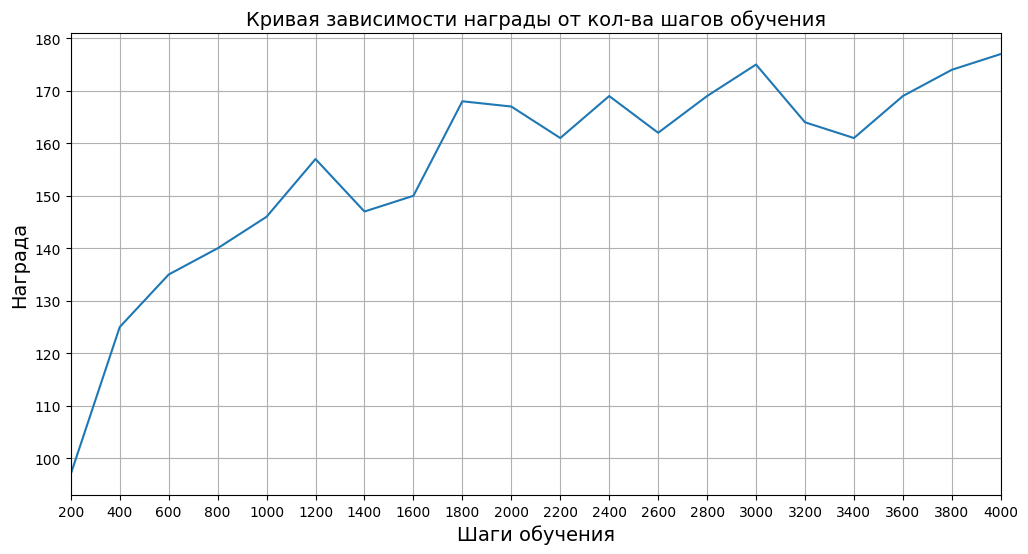

In [ ]:
fig = plt.figure(figsize = (12, 6))
i = np.arange(200, 4001, 200)
plt.plot(i, sum)
plt.xlabel('Шаги обучения', size=14)
plt.ylabel('Награда', size=14)
plt.title('Кривая зависимости награды от кол-ва шагов обучения', size=14)
plt.xlim(200, 4000)
plt.xticks(np.arange(200, 4001, 200))
plt.grid()
plt.show()